In [87]:
import pandas as pd
import numpy as np
import missingno as msno # 누락 된 데이터를 시각화 해주기 위해

import sys

In [88]:
from plotnine import *

In [89]:
train = pd.read_csv('all/train.csv')
train.shape

(891, 12)

In [90]:
test = pd.read_csv('all/test.csv')
test.shape

(418, 11)

In [91]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [93]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

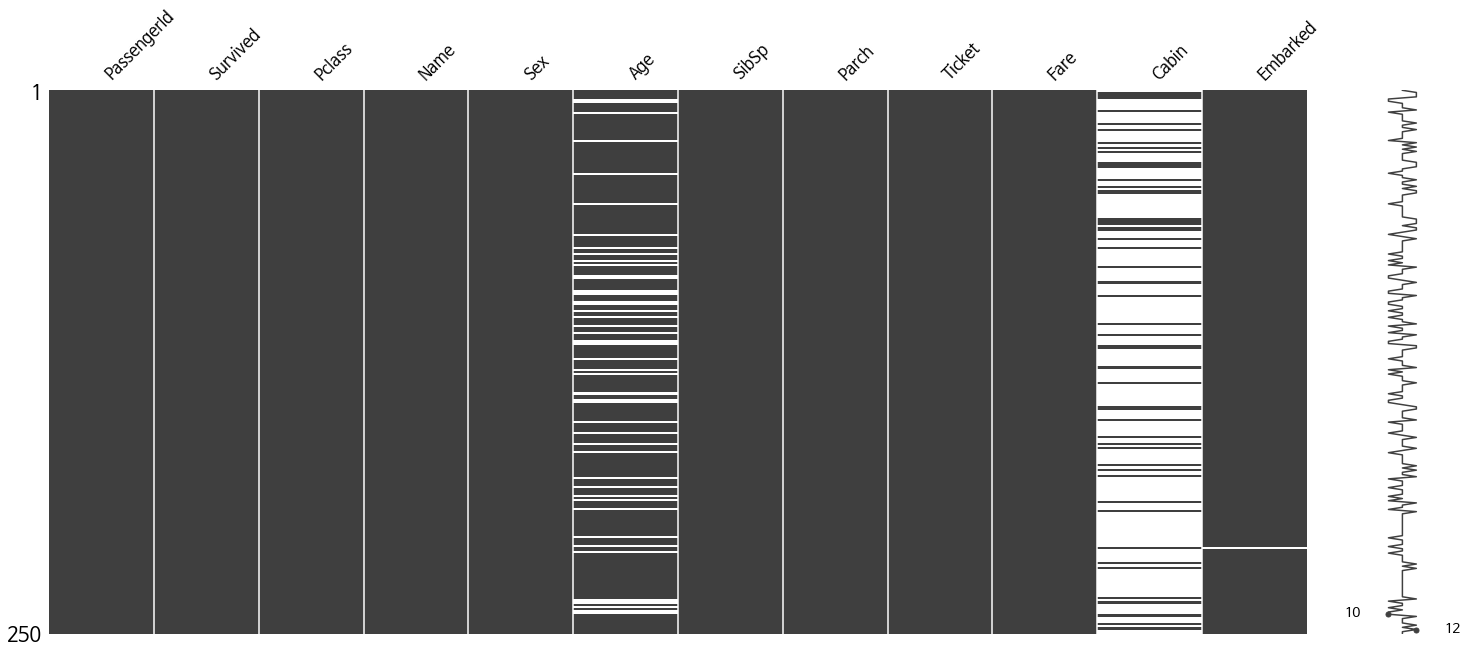

In [95]:
# 결측치를 시각화
%matplotlib inline
train = train.replace("nan", np.nan)
msno.matrix(train.sample(250))

# 사이킷런의 Imputer를 사용해서 결측치 채워주기

In [166]:
train_imputer = train.copy()
test_imputer = test.copy()

In [167]:
train_imputer['Age'][:5]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [168]:
# 벡터 데이터의 형태를 출력해 본다.
print(train_imputer['Age'].values.shape)
# reshape(-1,1)를 사용해 벡터 데이터를 행렬 데이터로 변환해 준다.
print(train_imputer['Age'].values.reshape(-1,1).shape)

(891,)
(891, 1)


In [169]:
# 벡터 데이터의 형태를 출력해 본다.
print(test_imputer['Age'].values.shape)
# reshape(-1,1)를 사용해 벡터 데이터를 행렬 데이터로 변환해 준다.
print(test_imputer['Age'].values.reshape(-1,1).shape)

(418,)
(418, 1)


In [170]:
from sklearn.preprocessing import Imputer

# 결측치를 보완해 준다.
def nan_padding(data, columns):
    for column in columns:
        imputer = Imputer(strategy='median')  #default:mean
        data[column] = imputer.fit_transform(data[column].values.reshape(-1,1))
    return data


nan_columns = ['Age', 'SibSp', 'Parch', 'Fare']

train_imputer = nan_padding(train_imputer, nan_columns)
test_imputer = nan_padding(test_imputer, nan_columns)

In [171]:
from sklearn.preprocessing import Imputer

# 결측치를 보완해 준다.
def nan_padding(data, columns):
    for column in columns:
        imputer = Imputer(strategy='median')  #default:mean
        data[column] = imputer.fit_transform(data[column].values.reshape(-1,1))
    return data


nan_columns = ['Age', 'SibSp', 'Parch', 'Fare']

train_imputer = nan_padding(train_imputer, nan_columns)
test_imputer = nan_padding(test_imputer, nan_columns)

In [172]:
print(train.isnull().sum())
print('-' * 20)
print(train_imputer.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_mean         0
Title            0
Gender           0
Embarked_S       0
Embarked_C       0
Embarked_Q       0
FamilySize       0
Family           0
Family_S         0
Family_M         0
Family_L         0
Fare_mean        0
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64
--------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_mean         0
Title            0
Gender           0
Embarked_S       0
Embarked_C       0
Embarked_Q       0
FamilySize       0
Family           0
Family_S         0
Family_M         0
Family_L         0
Fare_mean       

In [173]:
print(test.isnull().sum())
print('-' * 20)
print(test_imputer.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Age_mean         0
Title            0
Gender           0
Embarked_S       0
Embarked_C       0
Embarked_Q       0
FamilySize       0
Family           0
Family_S         0
Family_M         0
Family_L         0
Fare_mean        0
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Age_mean         0
Title            0
Gender           0
Embarked_S       0
Embarked_C       0
Embarked_Q       0
FamilySize       0
Family           0
Family_S         0
Family_M         0
Family_L         0
Fare_mean        0
Pclass_1         0
Pclass_2        

In [174]:
train_imputer[nan_columns].head()

,Age,SibSp,Parch,Fare
0,22.0,1.0,0.0,7.2500
1,38.0,1.0,0.0,71.2833
2,26.0,0.0,0.0,7.9250
3,35.0,1.0,0.0,53.1000
4,35.0,0.0,0.0,8.0500


In [165]:
test_imputer[nan_columns].head()

,Age,SibSp,Parch,Fare
0,34.5,0.0,0.0,7.8292
1,47.0,1.0,0.0,7.0000
2,62.0,0.0,0.0,9.6875
3,27.0,0.0,0.0,8.6625
4,22.0,1.0,1.0,12.2875


In [177]:
train['Age_mean'] = train_imputer['Age']
test['Age_mean'] = test_imputer['Age']

# .fillna 로 결측치 채워주기

In [102]:
train['Age_mean'] = train['Age']
train['Age_mean'].fillna(train['Age'].mean(), inplace = True)

In [103]:
test['Age_mean'] = test['Age']
test['Age_mean'].fillna(test['Age'].mean(), inplace = True)

In [104]:
train['Age'].isnull().sum()

177

In [105]:
train['Age_mean'].isnull().sum()

0

In [106]:
train['Age_mean'].mean()

29.699117647058763

In [107]:
train['Age'].mean()

29.69911764705882

### 3. 다른 컬럼 정보를 사용해서 결측치를 예측

In [108]:
train_cp = train.copy()
test_cp = test.copy()

In [109]:
# 결측치가 있는 지 확인
train['Name'].isnull().sum()

0

In [110]:
# 일부의 데이터만 찍어보았지만 모든 데이터가 콤마(,)와 마침표(.)가 들어가 있다.
# 여기에서 콤마 뒤의 데이터가 호칭이며 Miss, Ms, Mrs 등으로 나이를 추측해 볼 수 있다.
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [111]:
# 이름에서 Title 항목만 떼어낸다.
# 콤마로 분리를 하고 분리된 두 번째 데이터의 첫번째 항목을 가져온다.
train['Title'] = train['Name'].str.split(
    ", ", expand=True)[1].str.split(".", expand=True)[0]
train['Title'].head()

test['Title'] = test['Name'].str.split(
    ", ", expand=True)[1].str.split(".", expand=True)[0]
test['Title'].head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object

In [112]:
# 호칭의 갯수를 알아본다.
# Don은 스페인에서 세례명의 존칭 혹은 귀인을 뜻한다고 한다.
# Capt 또한 대위 또는 대령을 뜻한다.
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Mme               1
Lady              1
the Countess      1
Capt              1
Ms                1
Don               1
Jonkheer          1
Sir               1
Name: Title, dtype: int64

In [113]:
train.query("Title in ('Dona', 'Lady', 'the Countess')")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Title
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6,A16,C,48.0,Lady
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,33.0,the Countess


In [114]:
# 결혼한 여성 관련 호칭은 Mrs로 분류

train.loc[train['Title'].isin(['Dona', 'Lady', 'the Countess', 'Mme', 'Mlle']), 'Title'] = 'Ms'
test.loc[test['Title'].isin(['Dona', 'Lady', 'the Countess', 'Mme', 'Mlle']), 'Title'] = 'Ms'
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Ms            6
Col           2
Major         2
Jonkheer      1
Capt          1
Sir           1
Don           1
Name: Title, dtype: int64

In [115]:
train.loc[train['Title'].isin(['Don', 'Sir', 'Capt', 'Col', 'Major', 'Master', 'Rev', 'Dr', 'Jonkheer']), 'Title'] = 'Mr'
test.loc[test['Title'].isin(['Don', 'Sir', 'Capt', 'Col', 'Major', 'Master', 'Rev', 'Dr', 'Jonkheer']), 'Title'] = 'Mr'
train['Title'].value_counts()

Mr      578
Miss    182
Mrs     125
Ms        6
Name: Title, dtype: int64

In [197]:
test['Title_Miss'] = test['Title'] == 'Miss'
test['Title_Mr'] = test['Title'] == 'Mr'
test['Title_Mrs'] = test['Title'] == 'Mrs'
test['Title_Ms'] = test['Title'] == 'Ms'

In [213]:
train['Title_Miss'] = train['Title'] == 'Miss'
train['Title_Mr'] = train['Title'] == 'Mr'
train['Title_Mrs'] = train['Title'] == 'Mrs'
train['Title_Ms'] = train['Title'] == 'Ms'

# One-Hot_Encoding

In [116]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [117]:
train['Gender'] = (train['Sex'] == 'female')  # 조건이 하나일 때는 괄호 안 쳐줘도 상관 없음. 여러개일 때는 괄호 쳐줘야

In [118]:
test['Gender'] = (test['Sex'] == 'female')

In [119]:
train['Gender'].head()

0    False
1     True
2     True
3     True
4    False
Name: Gender, dtype: bool

In [120]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [121]:
train['Embarked'].isnull().sum()

2

In [122]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [123]:
test['Embarked'].isnull().sum()

0

In [124]:
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_Q'] = train['Embarked'] == 'Q'

In [125]:
train['Embarked_S'].head()

0     True
1    False
2     True
3     True
4     True
Name: Embarked_S, dtype: bool

In [126]:
train['Embarked_S'].sum()

644

In [127]:
train['Embarked_C'].sum()

168

In [128]:
train['Embarked_Q'].sum()

77

In [129]:
train[['Embarked', 'Embarked_S', 'Embarked_C', 'Embarked_Q']].head()

,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,S,True,False,False
1,C,False,True,False
2,S,True,False,False
3,S,True,False,False
4,S,True,False,False


In [130]:
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_Q'] = test['Embarked'] == 'Q'

# 가족 수 구하기

In [214]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Title',
       'Gender', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'FamilySize',
       'Family', 'Family_S', 'Family_M', 'Family_L', 'Fare_mean', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Ms'],
      dtype='object')

In [215]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [216]:
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [217]:
train['Family'] = train['FamilySize']
train.loc[train['FamilySize'] == 1, 'Family'] = 'S'
train.loc[(train['FamilySize'] > 1) & (train['FamilySize'] < 5),'Family'] = 'M'
train.loc[train['FamilySize'] > 4, 'Family'] = 'L'

In [218]:
train[['Family', 'FamilySize']].head()

,Family,FamilySize
0,M,2
1,M,2
2,S,1
3,M,2
4,S,1


In [219]:
train['Family_S'] = train['Family'] == 'S'
train['Family_M'] = train['Family'] == 'M'
train['Family_L'] = train['Family'] == 'L'

In [220]:
train[['FamilySize', 'Family', 'Family_S', 'Family_M', 'Family_L']].head()

,FamilySize,Family,Family_S,Family_M,Family_L
0,2,M,False,True,False
1,2,M,False,True,False
2,1,S,True,False,False
3,2,M,False,True,False
4,1,S,True,False,False


In [221]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['Family'] = test['FamilySize']
test.loc[test['FamilySize'] == 1, 'Family'] = 'S'
test.loc[(test['FamilySize'] > 1) & (test['FamilySize'] < 5),'Family'] = 'M'
test.loc[test['FamilySize'] > 4, 'Family'] = 'L'

In [222]:
test['Family_S'] = test['Family'] == 'S'
test['Family_M'] = test['Family'] == 'M'
test['Family_L'] = test['Family'] == 'L'

In [223]:
train['Family'].value_counts()

S    537
M    292
L     62
Name: Family, dtype: int64

In [280]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Title',
       'Gender', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'FamilySize',
       'Family', 'Family_S', 'Family_M', 'Family_L', 'Fare_mean', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Fare_Low', 'Fare_Medium', 'Fare_High', 'FareBin',
       'AgeBin'],
      dtype='object')

# Fare binning

In [255]:
train['Fare'].value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

In [256]:
# train['Fare_mean'] = train['Fare']
# train['Fare_mean'].fillna(train['Fare'].mean(), inplace = True)

In [257]:
# test['Fare_mean'] = test['Fare']
# test['Fare_mean'].fillna(test['Fare'].mean(), inplace = True)

In [268]:
train['Fare'].fillna(train['Fare'].median(), inplace = True)
# 중간값으로 누락된 나이 데이터를 채워준다.
train['Age'].fillna(train['Age'].median(), inplace = True)

In [269]:
train['Fare'].isnull().sum()

0

In [270]:
train['Fare_mean'].isnull().sum()

0

In [271]:
# train['Fare'] = train['FareValue']
# train.loc[train['FareValue'] <= 10, 'Fare'] = 'low'
# train.loc[(train['FareValue'] > 10) & (train['FareValue'] < 20),'Fare'] = 'middle'
# train.loc[train['FareValue'] > 20, 'Fare'] = 'high'

train["Fare_Low"] = train["Fare"] < 10
train["Fare_Medium"] = (train["Fare"] >= 10) & (train["Fare"] < 50 )
train["Fare_High"] = train["Fare"] >= 50

In [272]:
train['Fare_mean'].mean()

32.2042079685746

In [273]:
train['Fare'].mean()

32.2042079685746

In [274]:
# Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
# Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
# 몇 개 단위의 Bin으로 묶어줄지 지정해 주면 알아서 데이터를 분리해 줌
#train['FareBin'] = pd.qcut(train['Fare'], 4)

# Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
#train['AgeBin'] = pd.cut(train['Age'].astype(int), 5)

train['FareBin'] = pd.qcut(train['Fare'], 4)
train['AgeBin'] = pd.cut(train['Age'].astype(int), 5)

* [pandas.qcut — pandas 0.22.0 documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html)

In [275]:
train[['Fare', 'FareBin', 'Age', 'AgeBin']].head()

,Fare,FareBin,Age,AgeBin
0,7.2500,"(-0.001, 7.91]",22.0,"(16.0, 32.0]"
1,71.2833,"(31.0, 512.329]",38.0,"(32.0, 48.0]"
2,7.9250,"(7.91, 14.454]",26.0,"(16.0, 32.0]"
3,53.1000,"(31.0, 512.329]",35.0,"(32.0, 48.0]"
4,8.0500,"(7.91, 14.454]",35.0,"(32.0, 48.0]"


In [276]:
train['AgeBin'].value_counts()

(16.0, 32.0]     525
(32.0, 48.0]     186
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: AgeBin, dtype: int64

In [278]:
test["Fare_Low"] = test["Fare"] < 10
test["Fare_Medium"] = (test["Fare"] >= 10) & (test["Fare"] < 50 )
test["Fare_High"] = test["Fare"] >= 50

# p-class one-hot encoding

In [233]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [234]:
train['Pclass_1'] = train['Pclass'] == 1
train['Pclass_2'] = train['Pclass'] == 2
train['Pclass_3'] = train['Pclass'] == 3

In [235]:
train[['Pclass', 'Pclass_1', 'Pclass_2', 'Pclass_3']].head()

,Pclass,Pclass_1,Pclass_2,Pclass_3
0,3,False,False,True
1,1,True,False,False
2,3,False,False,True
3,1,True,False,False
4,3,False,False,True


In [236]:
test['Pclass_1'] = test['Pclass'] == 1
test['Pclass_2'] = test['Pclass'] == 2
test['Pclass_3'] = test['Pclass'] == 3

# Feature Selection

In [281]:
feature_names = ['Gender', 'Age_mean', 
                 'Embarked_S', 'Embarked_C', 'Embarked_Q', 
                 'Family_S', 'Family_M', 'Family_L',
                 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Ms',
                 'Fare_Low', 'Fare_Medium', 'Fare_High']

In [282]:
X_train = train[feature_names]
X_train.head()

,Gender,Age_mean,Embarked_S,Embarked_C,Embarked_Q,Family_S,Family_M,Family_L,Pclass_1,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Fare_Low,Fare_Medium,Fare_High
0,False,22.0,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False
1,True,38.0,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,True
2,True,26.0,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False
3,True,35.0,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True
4,False,35.0,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False


In [283]:
y_label = train['Survived']

In [284]:
X_test = test[feature_names]
X_test.head()

,Gender,Age_mean,Embarked_S,Embarked_C,Embarked_Q,Family_S,Family_M,Family_L,Pclass_1,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Fare_Low,Fare_Medium,Fare_High
0,False,34.5,False,False,True,True,False,False,False,False,True,False,True,False,False,True,False,False
1,True,47.0,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False
2,False,62.0,False,False,True,True,False,False,False,True,False,False,True,False,False,True,False,False
3,False,27.0,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False
4,True,22.0,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False


In [285]:
X_test.isnull().sum()

Gender         0
Age_mean       0
Embarked_S     0
Embarked_C     0
Embarked_Q     0
Family_S       0
Family_M       0
Family_L       0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Title_Miss     0
Title_Mr       0
Title_Mrs      0
Title_Ms       0
Fare_Low       0
Fare_Medium    0
Fare_High      0
dtype: int64

In [286]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Title', 'Gender',
       'Embarked_S', 'Embarked_C', 'Embarked_Q', 'FamilySize', 'Family',
       'Family_S', 'Family_M', 'Family_L', 'Fare_mean', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Survived', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Fare_Low', 'Fare_Medium', 'Fare_High'],
      dtype='object')

In [313]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=7, random_state=2018)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2018,
            splitter='best')

In [314]:
model.fit(X_train, y_label)
prediction = model.predict(X_test)

In [315]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [316]:
test['Survived'] = prediction

In [317]:
import os
os.environ["PATH"] += os.pathsep + r'/Users/yunkim/anaconda3/pkgs/graphviz-2.40.1-h0a44026_0/bin'

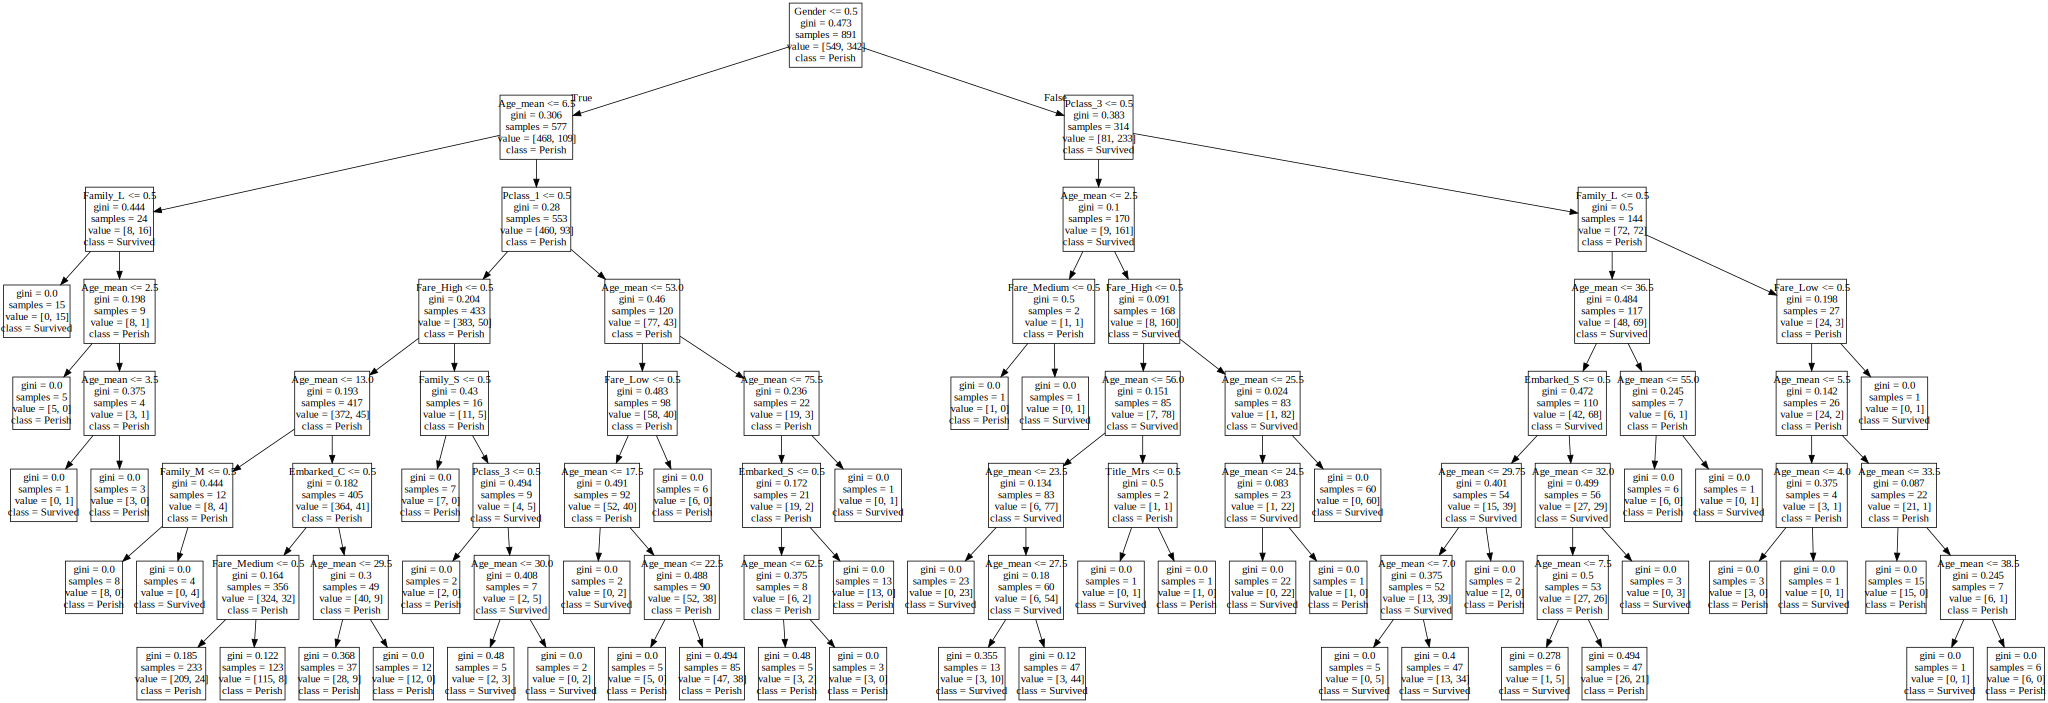

In [318]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [323]:
# https://www.kaggle.com/poonaml/titanic-survival-prediction-end-to-end-ml-pipeline
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(df):
    
    # Age값을 기준으로 학습과 테스트 세트로 분리
    train  = df.loc[ (df.Age.notnull()) ]# Age 값이 있는 row 
    test = df.loc[ (df.Age.isnull()) ]# Age 값이 없는 row 
    
    print(train.columns)
    # Age Label 데이터
    y = train['Age']
    
    # 피처를 생성해 준다.
    train_X = train.values[:, 2::]
    test_X = test.values[:, 2::]
    
    print(train_X.shape)
    print(test_X.shape)
    print(len(y))
    
    # 모델을 학습시킨다.
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(train_X, y)
    
    # 학습한 데이터를 바탕으로 결측치를 예측한다.
    predictedAges = rtr.predict(test_X)
    
    # 예측한 값을 Age가 null 인 데이터에 채워준다. 
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

In [324]:
submissions = test[['PassengerId', 'Survived']]
submissions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [325]:
submissions.to_csv('submissions/submit.csv', index=False)

In [326]:
score = round(model.score(X_train, y_label)*100, 2)

# 평가하기

In [327]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=2018)

scoring = 'accuracy'
score = cross_val_score(model, X_train, y_label, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

[0.8        0.82022472 0.86516854 0.88764045 0.82022472 0.74157303
 0.86516854 0.85393258 0.71910112 0.78651685]


81.6